<h1><B>Logistic Regression of Multiclass Classification</B></h1>

In [89]:
import pandas as pd
df = pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [90]:
dir(df)

['Id',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__firstlineno__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '

<h><b>X(features):-</h></b><br>
fixed acidity<br>
volatile acidity<br>
citric acid<br>
residual sugar<br>
chlorides	<br>
free sulfur dioxide<br>
total sulfur dioxide<br>
density	<br>
pH<br>
sulphates<br>
alcohol	<br>

In [91]:
X = df.drop('quality', axis=1)
y = df['quality']

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [93]:
X = df.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [94]:
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.04)

In [96]:
len(X_train)


1097

In [97]:
len(X_test)

46

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [99]:

model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
model.score(X_train, y_train)

0.6089334548769371

In [101]:
model.predict(X_test)

array([5, 6, 6, 5, 6, 5, 6, 7, 6, 7, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6,
       6, 6])

In [102]:
y_test

29      4
369     6
1084    5
686     5
1136    6
874     6
811     6
664     7
939     6
998     6
993     6
580     7
1121    6
968     6
910     6
292     6
552     6
230     6
38      6
641     6
767     7
344     6
307     6
864     6
546     6
384     5
462     5
463     6
563     5
328     6
737     6
1102    5
1046    3
555     6
1105    5
261     5
209     6
988     5
680     6
468     6
245     6
137     6
786     6
570     5
745     7
431     6
Name: quality, dtype: int64

In [106]:
model.score(X_test, y_test)

0.6521739130434783

In [104]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  6,  3,  1],
       [ 0,  0,  7, 22,  1],
       [ 0,  0,  0,  2,  2]])

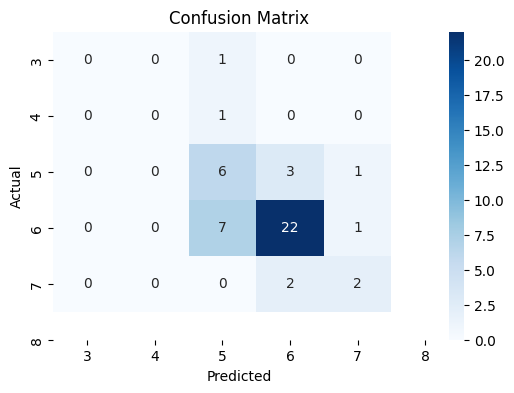

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=model.classes_,
    yticklabels=model.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<b>Confusion Matrix Observation</b><br>
the area were you don't see zero then their the model is not working<br>
It mean if 0 position the model is predicting the correct prediction <br>
22 number says, 22 times model pedicted 6 and actual value was also 6, it means correct prediction<br>
similarly, 2 times actual - 7 but predicted 6 and 7<br>
similar of 1 time predicted 5 but it was 3<br>
